In [1]:
from tools import *
from func import *
%matplotlib inline

# Chap1 语言处理与Python

目的：

1.  简单的程序如何与大规模的文本结合？
2.  如何自动地提取出关键字和词组？如何使用它们来总结文本的风格和内容？
3.  Python为文本处理提供了哪些工具和技术？
4.  自然语言处理中还有哪些有趣的挑战？

## 1.1  语言计算：文本和词汇

### 1.1.1 Python 入门

In [2]:
# Python 是解释型语言，立刻执行
1+5*2-3

8

### 1.1.2 NLTK 入门

In [3]:
# 不知为何国内用不起，只能自己下载数据文件，解压到 C:\nltk_data 目录下
# 数据下载：https://pan.baidu.com/s/1rDpWeknm13dyoyjsqu7zFg 提取码：eq5x

# nltk.download()
from nltk.book import *

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


### 1.1.3 搜索文本

In [4]:
show_title("搜索单词 monstrous，显示其所在的上下文")
text1.concordance('monstrous')

=============== >搜索单词 monstrous，显示其所在的上下文< ===============
Displaying 11 of 11 matches:
ong the former , one was of a most monstrous size . ... This came towards us , 
ON OF THE PSALMS . " Touching that monstrous bulk of the whale or ork we have r
ll over with a heathenish array of monstrous clubs and spears . Some were thick
d as you gazed , and wondered what monstrous cannibal and savage could ever hav
that has survived the flood ; most monstrous and most mountainous ! That Himmal
they might scout at Moby Dick as a monstrous fable , or still worse and more de
th of Radney .'" CHAPTER 55 Of the Monstrous Pictures of Whales . I shall ere l
ing Scenes . In connexion with the monstrous pictures of whales , I am strongly
ere to enter upon those still more monstrous stories of them which are to be fo
ght have been rummaged out of this monstrous cabinet there is no telling . But 
of Whale - Bones ; for Whales of a monstrous size are oftentimes cast up dead u


In [5]:
show_title("搜索与 monstrous 具有相同上下文的单词")
show_subtitle("text1")
text1.similar('monstrous')
show_subtitle("text2")
text2.similar('monstrous')

=============== >搜索与 monstrous 具有相同上下文的单词< ===============
--------------- >text1< ---------------
true contemptible christian abundant few part mean careful puzzled
mystifying passing curious loving wise doleful gamesome singular
delightfully perilous fearless
--------------- >text2< ---------------
very so exceedingly heartily a as good great extremely remarkably
sweet vast amazingly


In [6]:
show_title("搜索 monstrous 与 very 两个单词的相同上下文")
text2.common_contexts(['monstrous','very'])

=============== >搜索 monstrous 与 very 两个单词的相同上下文< ===============
am_glad a_pretty a_lucky is_pretty be_glad


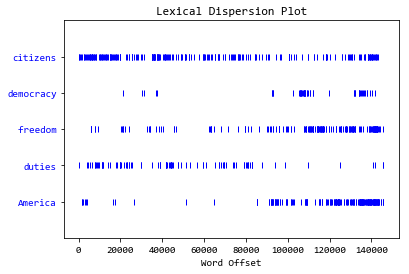

In [7]:
# 图1-2：美国总统就职演说词汇分布图：可以用来研究随时间推移语言使用上的变化
text4.dispersion_plot(['citizens','democracy','freedom','duties','America'])

In [8]:
# nltk 3 已经放弃这个功能
text3.generate()

Building ngram index...
laid by her , and said unto Cain , Where art thou , and said , Go to ,
I will not do it for ten ' s sons ; we dreamed each man according to
their generatio the firstborn said unto Laban , Because I said , Nay ,
but Sarah shall her name be . , duke Elah , duke Shobal , and Akan .
and looked upon my affliction . Bashemath Ishmael ' s blood , but Isra
for as a prince hast thou found of all the cattle in the valley , and
the wo The


"laid by her , and said unto Cain , Where art thou , and said , Go to ,\nI will not do it for ten ' s sons ; we dreamed each man according to\ntheir generatio the firstborn said unto Laban , Because I said , Nay ,\nbut Sarah shall her name be . , duke Elah , duke Shobal , and Akan .\nand looked upon my affliction . Bashemath Ishmael ' s blood , but Isra\nfor as a prince hast thou found of all the cattle in the valley , and\nthe wo The"

### 1.1.4 计数词汇

In [9]:
print("text3 中的单词个数：", len(text3))
print("text3 中的单词数：",len(set(text3)))
print("text3 中的单词排序：", sorted(set(text3))[0:20])

text3 中的单词个数： 44764
text3 中的单词数： 2789
text3 中的单词排序： ['!', "'", '(', ')', ',', ',)', '.', '.)', ':', ';', ';)', '?', '?)', 'A', 'Abel', 'Abelmizraim', 'Abidah', 'Abide', 'Abimael', 'Abimelech']


In [10]:
print("text3 中每个单词被使用的次数的平均数：",len(text3)/len(set(text3)))
print("text3 中每个单词被使用的次数的平均数：", lexical_diversity(text3))
print("text5 中每个单词被使用的次数的平均数：", lexical_diversity(text5))

text3 中每个单词被使用的次数的平均数： 16.050197203298673
text3 中每个单词被使用的次数的平均数： 16.050197203298673
text5 中每个单词被使用的次数的平均数： 7.420046158918563


In [11]:
print("text3 中单词 'smote' 的使用次数：", text3.count("smote"))
print("text3 中单词 'smote' 的出现比例：", percentage(text3.count("smote"),len(text3)))

text3 中单词 'smote' 的使用次数： 5
text3 中单词 'smote' 的出现比例： 0.01116968992940756


In [12]:
print("text4 中单词 'a' 的出现比例：", 100*text4.count('a')/len(text4))
print("text4 中单词 'a' 的出现比例：", percentage(text4.count('a'), len(text4)))

text4 中单词 'a' 的出现比例： 1.4643016433938312
text4 中单词 'a' 的出现比例： 1.4643016433938312
